C:\Users\Сергій\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Сергій\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Сергій\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Сергій\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\

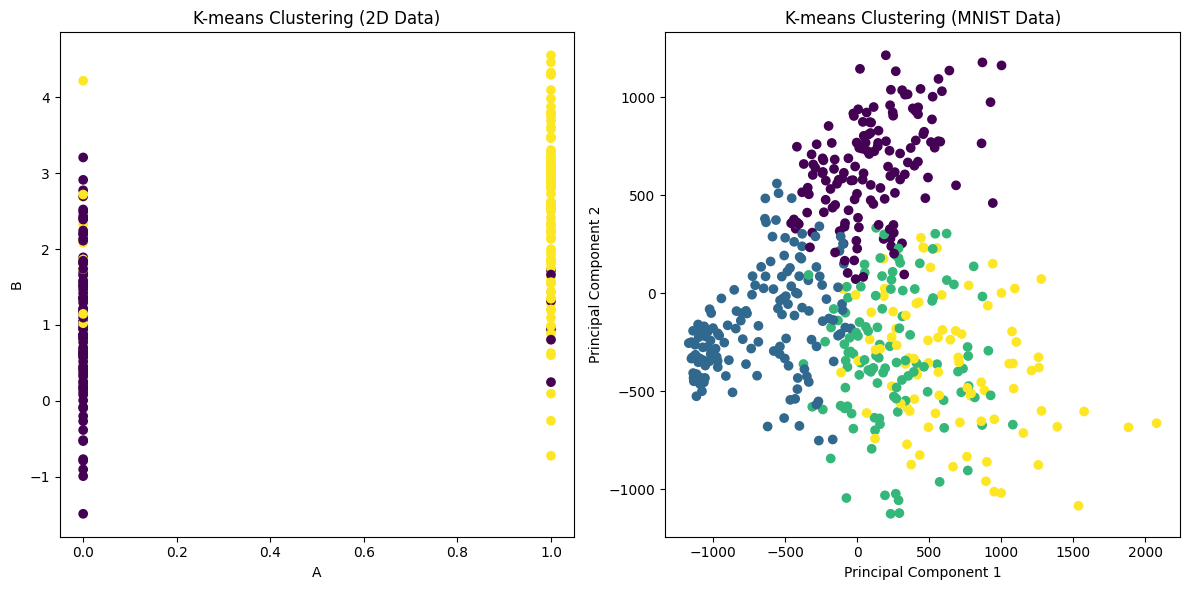

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from kneed import KneeLocator

# Завдання 1: Завантаження та кластеризація даних

# Завантаження двовимірного датасету з правильним роздільником
data_2d = pd.read_csv(r'C:\Users\Сергій\Documents\Code\Current_task\Math-test\task6\data_2d.csv', delimiter=',', header=None, names=['A', 'B', 'C'])

# Завантаження mnist датасету
mnist_data = pd.read_csv(r'C:\Users\Сергій\Documents\Code\Current_task\Math-test\task6\mnist.csv')

# Функція для знаходження оптимальної кількості кластерів за допомогою ліктевого методу
def find_optimal_clusters(data, max_clusters=10):
    wcss = []  # Within-cluster sum of squares

    for i in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)

    return wcss

# Знаходження оптимальної кількості кластерів для двовимірного датасету
wcss_2d = find_optimal_clusters(data_2d[['A', 'B', 'C']])
elbow_2d = KneeLocator(range(1, 11), wcss_2d, curve='convex', direction='decreasing')

# Завдання 2: Візуалізація результатів

# Візуалізація для двовимірного датасету
kmeans_2d = KMeans(n_clusters=elbow_2d.elbow, init='k-means++', random_state=42)
data_2d['cluster'] = kmeans_2d.fit_predict(data_2d[['A', 'B', 'C']])

plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.scatter(data_2d['A'], data_2d['B'], c=data_2d['cluster'], cmap='viridis')
plt.title('K-means Clustering (2D Data)')
plt.xlabel('A')
plt.ylabel('B')

# Функція для візуалізації результатів для mnist датасету
def visualize_mnist_clusters(data, elbow):
    pca = PCA(n_components=2)  # Зменшення розмірності до 2D за допомогою PCA
    mnist_data_2d = pca.fit_transform(data)

    kmeans_mnist = KMeans(n_clusters=elbow.elbow, init='k-means++', random_state=42)
    data['cluster'] = kmeans_mnist.fit_predict(data)

    plt.subplot(122)
    plt.scatter(mnist_data_2d[:, 0], mnist_data_2d[:, 1], c=data['cluster'], cmap='viridis')
    plt.title('K-means Clustering (MNIST Data)')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')

visualize_mnist_clusters(mnist_data, elbow_mnist)
plt.tight_layout()
plt.show()
